In [8]:
from PIL import Image, ImageEnhance, ImageFilter, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from functools import reduce
import os

In [9]:
# Decorator
def log_transformation(func):
    def wrapper(*args, **kwargs):
        print(f"✓ Menerapkan: {func.__name__.replace('_', ' ').title()}")
        result = func(*args, **kwargs)
        return result
    return wrapper

def create_transformer(transform_func):
    return lambda img: transform_func(img)

In [ ]:
@log_transformation
def adjust_brightness(image, factor=1.5):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

@log_transformation
def resize_image(image, size=(300, 300)):
    return image.resize(size, Image.Resampling.LANCZOS)

@log_transformation
def add_border(image, border_width=20, border_color='black'):
    width, height = image.size
    new_width = width + 2 * border_width
    new_height = height + 2 * border_width
    
    bordered_image = Image.new(image.mode, (new_width, new_height), border_color)
    bordered_image.paste(image, (border_width, border_width))
    return bordered_image

@log_transformation
def sharpen_image(image):
    return image.filter(ImageFilter.SHARPEN)

@log_transformation
def convert_to_grayscale(image):
    return image.convert('L')

@log_transformation
def add_watermark(image, text="Your Name", position='bottom_right'):
    if image.mode == 'L':
        image = image.convert('RGB')
    
    draw = ImageDraw.Draw(image)
    
    try:
        font = ImageFont.truetype("arial.ttf", 20)
    except:
        font = ImageFont.load_default()
    
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    
    width, height = image.size
    x = width - text_width - 10
    y = height - text_height - 10
    
    draw.text((x-1, y-1), text, fill='black', font=font)
    draw.text((x+1, y-1), text, fill='black', font=font)
    draw.text((x-1, y+1), text, fill='black', font=font)
    draw.text((x+1, y+1), text, fill='black', font=font)
    draw.text((x, y), text, fill='white', font=font)
    
    return image

In [11]:
def compose(*functions):
    return lambda x: reduce(lambda acc, func: func(acc), functions, x)

def create_image_pipeline(watermark_text="Your Name"):
    def pipeline(image):
        transformations = [
            lambda img: adjust_brightness(img, 1.5),
            lambda img: resize_image(img, (300, 300)),
            lambda img: add_border(img, 20, 'black'),
            sharpen_image,
            convert_to_grayscale,
            lambda img: add_watermark(img, watermark_text)
        ]
        
        composed_transform = compose(*transformations)
        return composed_transform(image)
    
    return pipeline

In [12]:
def create_comparison_viewer(title_func):
    def viewer(original, processed):
        fig, axes = plt.subplots(1, 2, figsize=(15, 7))
        
        axes[0].imshow(original)
        axes[0].set_title(title_func('Original'), fontsize=14, fontweight='bold')
        axes[0].axis('off')
        
        # Gambar hasil
        axes[1].imshow(processed, cmap='gray')
        axes[1].set_title(title_func('Processed'), fontsize=14, fontweight='bold')
        axes[1].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Tampilkan info
        print(f"\n{'='*60}")
        print(f"Original Image Size: {original.size}")
        print(f"Processed Image Size: {processed.size}")
        print(f"Original Mode: {original.mode}")
        print(f"Processed Mode: {processed.mode}")
        print(f"{'='*60}")
    
    return viewer

generate_title = lambda label: f"{label} Image"

display_comparison = create_comparison_viewer(generate_title)

IMAGE MANIPULATION - PARADIGMA FUNGSIONAL

Memproses gambar: esp32.jpg


Menerapkan transformasi:

✓ Menerapkan: Adjust Brightness
✓ Menerapkan: Resize Image
✓ Menerapkan: Add Border
✓ Menerapkan: Sharpen Image
✓ Menerapkan: Convert To Grayscale
✓ Menerapkan: Add Watermark

✓ Gambar berhasil disimpan di: D:\Prak. Fungsional\modul6\images\esp32_edited.jpg



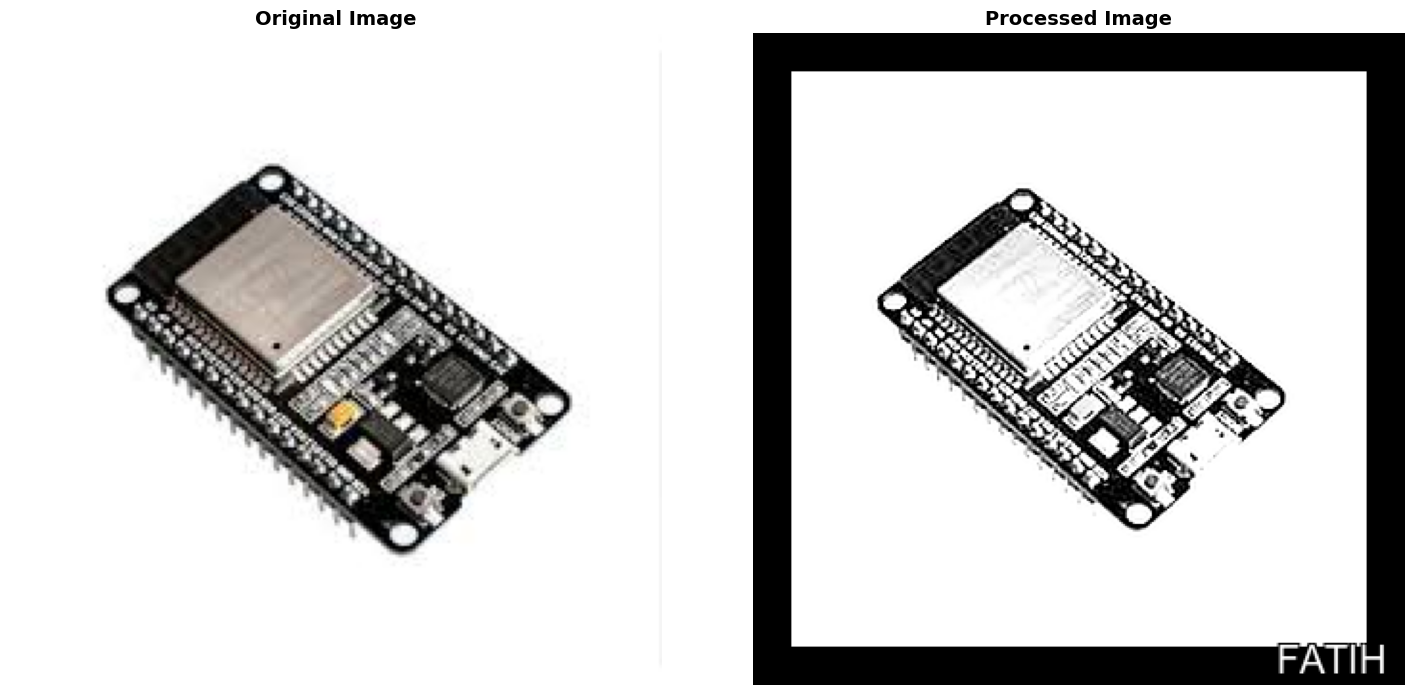


Original Image Size: (225, 225)
Processed Image Size: (340, 340)
Original Mode: RGB
Processed Mode: RGB


In [13]:
image_path = r"D:\Prak. Fungsional\modul6\images\esp32.jpg"
output_path = r"D:\Prak. Fungsional\modul6\images\esp32_edited.jpg"

YOUR_NAME = "FATIH"

print("="*60)
print("IMAGE MANIPULATION - PARADIGMA FUNGSIONAL")
print("="*60)
print(f"\nMemproses gambar: {os.path.basename(image_path)}\n")

original_image = Image.open(image_path)

image_pipeline = create_image_pipeline(watermark_text=YOUR_NAME)

print("\nMenerapkan transformasi:\n")
processed_image = image_pipeline(original_image.copy())

processed_image.save(output_path)
print(f"\n✓ Gambar berhasil disimpan di: {output_path}\n")

display_comparison(original_image, processed_image)

PROSES TRANSFORMASI BERTAHAP

Langkah 1: Meningkatkan kecerahan +50%
✓ Menerapkan: Adjust Brightness
Langkah 2: Mengubah ukuran menjadi 300x300 pixel
✓ Menerapkan: Resize Image
Langkah 3: Menambahkan border hitam 20 pixel
✓ Menerapkan: Add Border
Langkah 4: Mempertajam gambar
✓ Menerapkan: Sharpen Image
Langkah 5: Mengubah ke grayscale
✓ Menerapkan: Convert To Grayscale
Langkah 6: Menambahkan watermark
✓ Menerapkan: Add Watermark


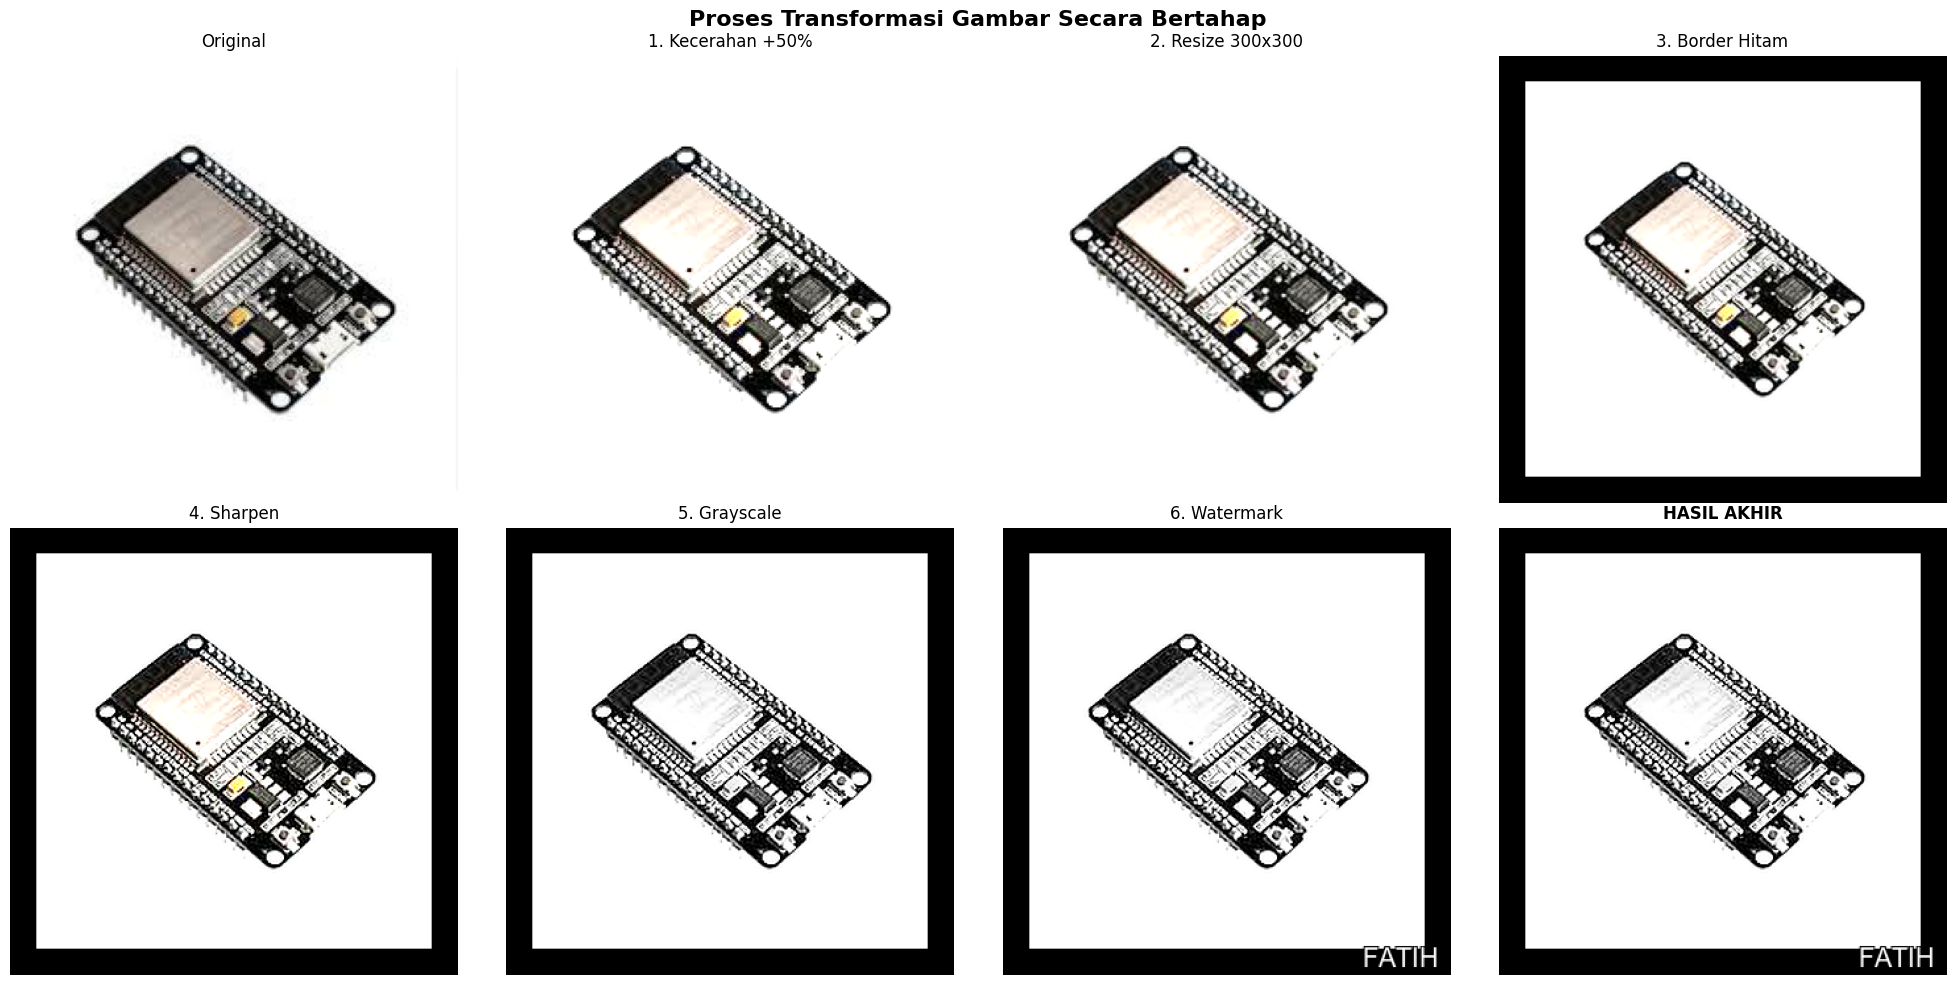


✓ Proses transformasi selesai!


In [14]:
print("="*60)
print("PROSES TRANSFORMASI BERTAHAP")
print("="*60)

img_original = Image.open(image_path)

print("\nLangkah 1: Meningkatkan kecerahan +50%")
img_step1 = adjust_brightness(img_original.copy(), 1.5)

print("Langkah 2: Mengubah ukuran menjadi 300x300 pixel")
img_step2 = resize_image(img_step1, (300, 300))

print("Langkah 3: Menambahkan border hitam 20 pixel")
img_step3 = add_border(img_step2, 20, 'black')

print("Langkah 4: Mempertajam gambar")
img_step4 = sharpen_image(img_step3)

print("Langkah 5: Mengubah ke grayscale")
img_step5 = convert_to_grayscale(img_step4)

print("Langkah 6: Menambahkan watermark")
img_step6 = add_watermark(img_step5, YOUR_NAME)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Proses Transformasi Gambar Secara Bertahap', fontsize=16, fontweight='bold')

steps = [
    (img_original, "Original", None),
    (img_step1, "1. Kecerahan +50%", None),
    (img_step2, "2. Resize 300x300", None),
    (img_step3, "3. Border Hitam", None),
    (img_step4, "4. Sharpen", None),
    (img_step5, "5. Grayscale", 'gray'),
    (img_step6, "6. Watermark", 'gray'),
    (img_step6, "HASIL AKHIR", 'gray')
]

for idx, (img, title, cmap) in enumerate(steps):
    row = idx // 4
    col = idx % 4
    axes[row, col].imshow(img, cmap=cmap)
    axes[row, col].set_title(title, fontsize=12, fontweight='bold' if idx == 7 else 'normal')
    axes[row, col].axis('off')
    
    if idx == 7:
        for spine in axes[row, col].spines.values():
            spine.set_edgecolor('green')
            spine.set_linewidth(3)
            spine.set_visible(True)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("✓ Proses transformasi selesai!")
print(f"{'='*60}")